In [2]:
import pandas as pd

from fhir2dataset.query import Query
from fhir2dataset.fhirrules_getter import FHIRRules
from fhir2dataset.parser import FHIR2DatasetParser

ModuleNotFoundError: No module named 'fhir2dataset'

In [2]:

fhir_api_url = 'http://hapi.fhir.org/baseR4/'

fhir_rules=FHIRRules(fhir_api_url=fhir_api_url)

query = Query(fhir_api_url,fhir_rules=fhir_rules)

parser = FHIR2DatasetParser()


the instance of SearchParameter named _text has no fhirpath associated

the instance of SearchParameter named _content has no fhirpath associated

the instance of SearchParameter named _query has no fhirpath associated


In [8]:
sql_like_query = "SELECT patient.family, patient.birthdate, patient.id, practitioner.family, practitioner.address.city, practitioner.id, allergy.code.coding.display, allergy.id, condition.code.coding.display, condition.severity.coding.display, condition.id FROM AllergyIntolerance AS allergy INNER JOIN Patient AS patient ON allergy.patient = patient.id INNER JOIN Practitioner AS practitioner ON allergy.asserter = practitioner.id INNER JOIN Condition AS condition ON condition.subject = patient.id WHERE patient.birthdate = 1976 AND allergy.code = http://snomed.info/sct|22749300 AND practitioner.address-city = paris AND condition.code = http://snomed.info/sct|386661006"

In [9]:
config_from_parser = parser.parse(sql_like_query)

In [10]:
query.from_config(config_from_parser)

In [11]:
query.execute()

In [13]:
df = query.main_dataframe
df

,allergy:code.coding.display,allergy:id,patient:family,patient:birthdate,patient:id,practitioner:family,practitioner:address.city,practitioner:id,condition:code.coding.display,condition:severity.coding.display,condition:id
0,[Cashew nuts],[frt4],[Smith],[1976-01-01],[frt2],[Careful],[Paris],[frt1],[Cashew nuts],[Mild],[frt3]
1,[Cashew nuts],[al9],[Green],[1976-01-01],[i3],[Careful],[Paris],[pp4],[Cashew nuts],[Mild],[cc7]


In [14]:
for df in query.dataframes.values():
    display(df.head(5))

,allergy:from_id,allergy:join_patient,allergy:join_asserter,allergy:where_code,allergy:code.coding.display,allergy:id
0,AllergyIntolerance/frt4,Patient/frt2,Practitioner/frt1,[the fhirpath could not be evaluated by the li...,[Cashew nuts],[frt4]
0,AllergyIntolerance/al9,Patient/i3,Practitioner/pp4,[the fhirpath could not be evaluated by the li...,[Cashew nuts],[al9]


,patient:from_id,patient:where_birthdate,patient:family,patient:birthdate,patient:id
0,Patient/frt2,[1976-01-01],[Smith],[1976-01-01],[frt2]
0,Patient/i3,[1976-01-01],[Green],[1976-01-01],[i3]


,practitioner:from_id,practitioner:where_address-city,practitioner:family,practitioner:address.city,practitioner:id
0,Practitioner/frt1,[Paris],[Careful],[Paris],[frt1]
0,Practitioner/pp4,[Paris],[Careful],[Paris],[pp4]


,condition:from_id,condition:join_subject,condition:where_code,condition:code.coding.display,condition:severity.coding.display,condition:id
0,Condition/f105f80c-52d6-4e21-886b-9ec46d332307,Patient/30dcdb89-e6be-4fed-810b-43ef0d9db8f8,[the fhirpath could not be evaluated by the li...,[Fever (finding)],[],[f105f80c-52d6-4e21-886b-9ec46d332307]
0,Condition/frt3,Patient/frt2,[the fhirpath could not be evaluated by the li...,[Cashew nuts],[Mild],[frt3]
0,Condition/cc7,Patient/i3,[the fhirpath could not be evaluated by the li...,[Cashew nuts],[Mild],[cc7]


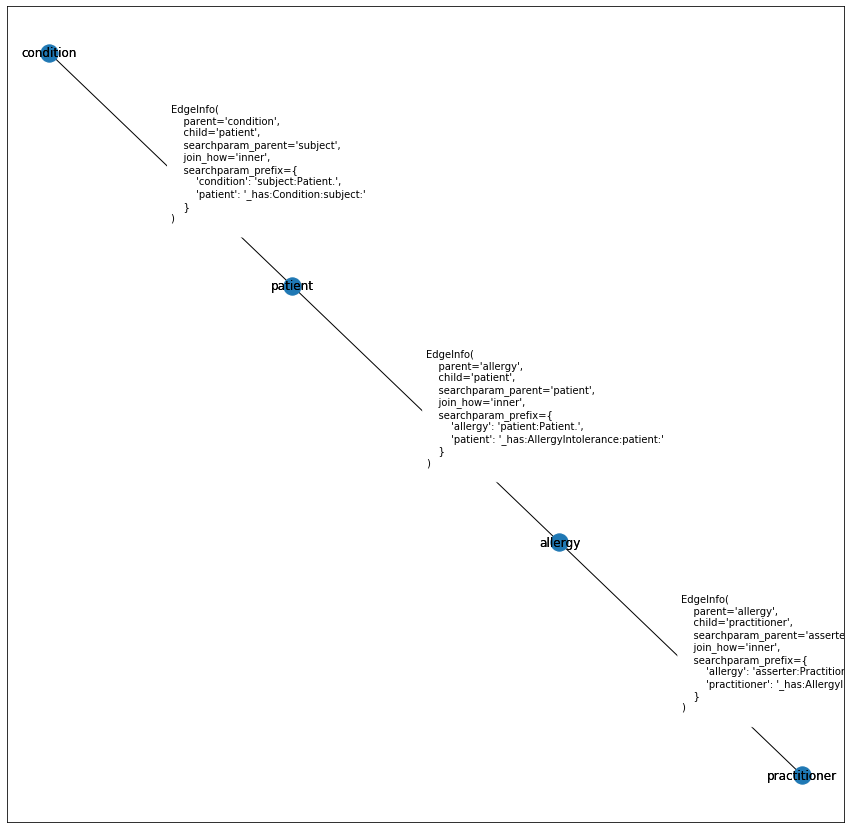

In [14]:
query.graph_query.draw_relations()